In [1]:
# https://www.kaggle.com/primaryobjects/voicegender
from springyknn.springyknn import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
data = pd.read_csv("voice/voice.csv")

In [10]:
import numpy as np
gender = data['label'].unique()
print(gender)
gender_to_id = {}
gender_to_id['male'] = 0
gender_to_id['female'] = 1
num_cols = data.shape[1]
x_train = data.iloc[:,:num_cols-1].as_matrix()
y_train = np.asarray([gender_to_id[g] for g in data['label']]).reshape(-1,1)
rndperm = np.random.permutation(x_train.shape[0])
x_train = x_train[rndperm]
y_train = y_train[rndperm]
print(x_train.shape)
print(y_train.shape)
print(x_train[0])

['male' 'female']
(3168, 20)
(3168, 1)
[ 0.18016601  0.06228258  0.16078603  0.12563319  0.24056769  0.1149345
  1.01880452  3.03587397  0.91709765  0.3929661   0.14366812  0.18016601
  0.12777565  0.04757185  0.27745665  0.9546596   0.0234375   3.890625
  3.8671875   0.1760101 ]


In [32]:
springyknn = SpringyKNN(x_train, y_train, randomize=True, num_pivots=3168)
G = springyknn.get_springy_knn_graph(k1=10, k2=10)
springyknn.write_gexf(G, filename='voice_springyknn_graph.gexf')

  9%|▉         | 287/3168 [00:00<00:01, 2865.76it/s]

Started kNN of data on pivots...
Finished kNN of data on pivots in  0.013937234878540039  secs
Started spring strength computation between pivots...


100%|██████████| 3168/3168 [00:00<00:00, 37130.39it/s]


Finished spring strength computation in  0.6864502429962158  secs
Started kNN graph computation from lil_matrix...
Finished kNN graph of pivots in  0.15351200103759766  secs
Preparing networkx graph...
Finished preparing networkx graph in  0.06252694129943848  secs
Saved gexf file


Preparing networkx visualization...
Computing circular layout positions...
Finished computing circular layout positions in  0.0016431808471679688  secs
Computing spring layout positions...
Finished computing spring layout positions in  111.09593796730042  secs


<IPython.core.display.Javascript object>


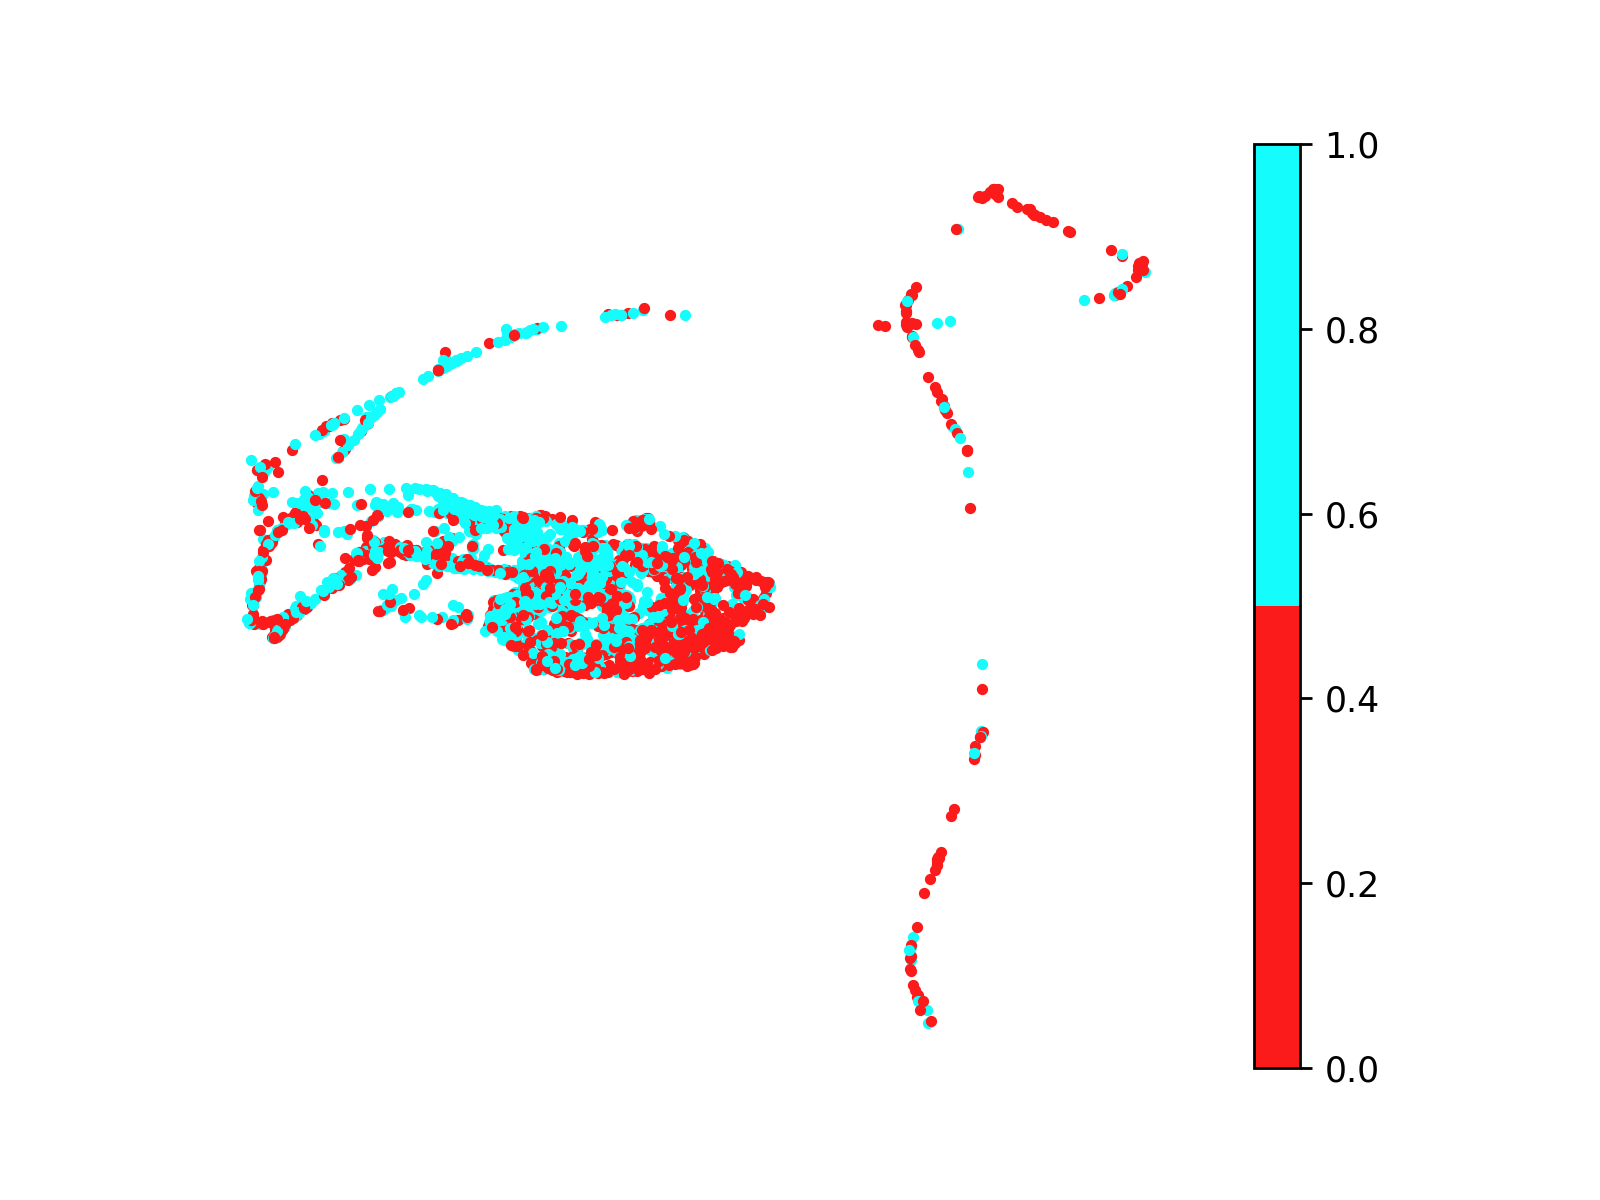

Finished networkx visualization in  120.0210599899292  secs


In [35]:
springyknn.viz_spring_graph(G, dim=2, iterations=150, scale=1.0)

In [28]:
def normalize(x):
    x_min = np.min(x, axis=0).reshape(1,-1)
    x_max = np.max(x, axis=0).reshape(1,-1)
    return (x-x_min)/(x_max-x_min)

In [29]:
nx_train = normalize(x_train)
ny_train = y_train

In [31]:
nspringyknn = SpringyKNN(nx_train, ny_train, randomize=True, num_pivots=3168)
nG = springyknn.get_springy_knn_graph(k1=10, k2=10)
nspringyknn.write_gexf(G, filename='nvoice_springyknn_graph.gexf')

  9%|▊         | 275/3168 [00:00<00:01, 2742.76it/s]

Started kNN of data on pivots...
Finished kNN of data on pivots in  0.013392210006713867  secs
Started spring strength computation between pivots...


100%|██████████| 3168/3168 [00:00<00:00, 35549.61it/s]


Finished spring strength computation in  0.6851379871368408  secs
Started kNN graph computation from lil_matrix...
Finished kNN graph of pivots in  0.15221595764160156  secs
Preparing networkx graph...
Finished preparing networkx graph in  0.062077999114990234  secs
Saved gexf file


In [34]:
nspringyknn.viz_spring_graph(nG, dim=2, iterations=150, scale=1.0)

Preparing networkx visualization...
Computing circular layout positions...
Finished computing circular layout positions in  0.0014688968658447266  secs
Computing spring layout positions...
Finished computing spring layout positions in  109.77741003036499  secs
Finished networkx visualization in  137.4339771270752  secs
